# Tutorial10: mandelbrot 集合

本节旨在展示如何在 scow 平台上使用作业提交面板提交作业。本节使用的脚本是计算 [[mandelbrot]](https://zh.wikipedia.org/wiki/%E6%9B%BC%E5%BE%B7%E5%8D%9A%E9%9B%86%E5%90%88) 集合的图示。

分以下几步来实现：
1. 环境安装与应用创建
2. 编写脚本
3. 提交作业
4. 查看结果

## 1. 环境安装与应用创建

首先在联网的命令行中创建conda环境:
```bash
conda create -n tutorial10 python=3.9
conda activate tutorial10
pip install numpy matplotlib multiprocessing
```

## 2. 编写脚本

运行下面代码块，将在当前目录下生成脚本 mandelbrot.py

In [3]:
string = """import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool

def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z**2 + c
        n += 1
    return n

def mandelbrot_row(y, x_values, max_iter):
    return [mandelbrot(complex(x, y), max_iter) for x in x_values]

def plot_mandelbrot(xmin, xmax, ymin, ymax,
        width, height, max_iter, filename):
    x_values = np.linspace(xmin, xmax, width)
    y_values = np.linspace(ymin, ymax, height)

    # 使用多进程池来并行计算每一行
    with Pool() as pool:
        result = pool.starmap(mandelbrot_row,
            [(y, x_values, max_iter) for y in y_values])

    mandelbrot_set = np.array(result)

    plt.imshow(mandelbrot_set, extent=(xmin, xmax, ymin, ymax), cmap='hot')
    plt.colorbar()
    plt.title("Mandelbrot Set")
    plt.xlabel("Re")
    plt.ylabel("Im")

    # 保存图片
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

# 调用函数并保存图片为 'mandelbrot.png'
plot_mandelbrot(-2.0, 1.0, -1.5, 1.5, 10000, 10000, 1000, 'mandelbrot.png')
"""
# 写入文件
with open('mandelbrot.py', 'w') as file:
    file.write(string)

# 3. 提交作业

在作业提交面板中提交作业

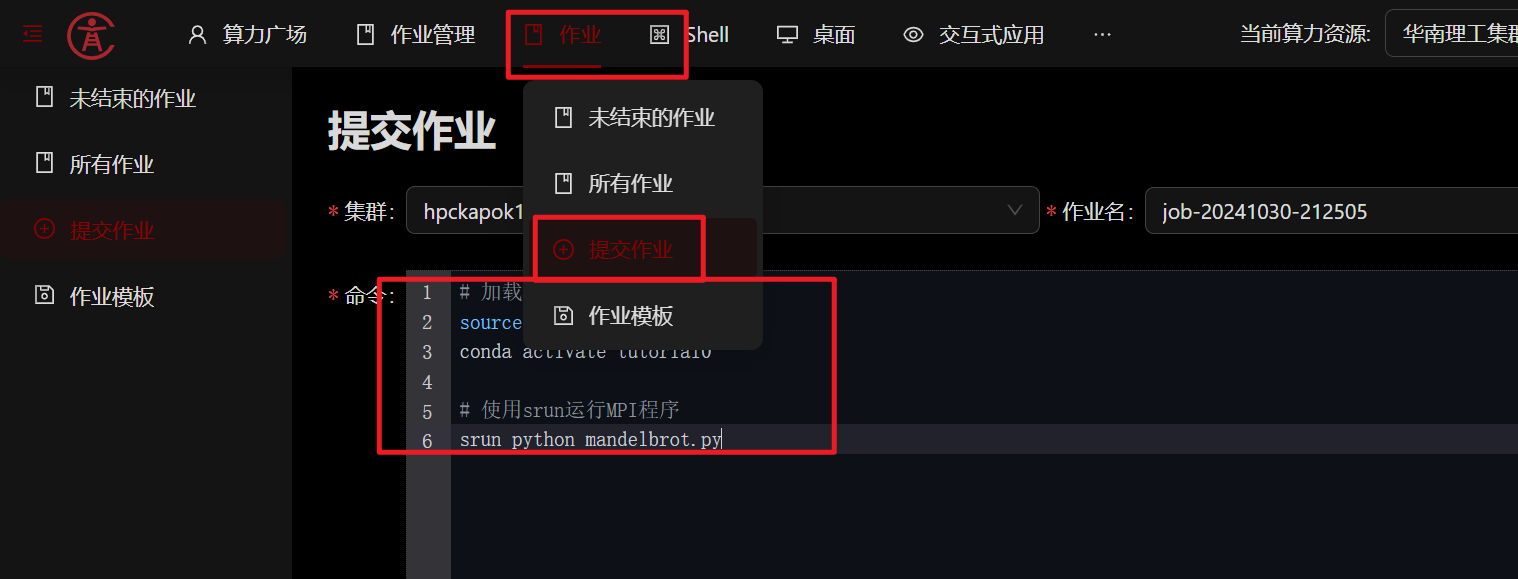


命令：
```bash
# 加载必要的模块
source ~/.bashrc
conda activate tutorial0

# 使用srun运行MPI程序
srun python mandelbrot.py
```

# 4. 查看结果

在文件管理中查看结果

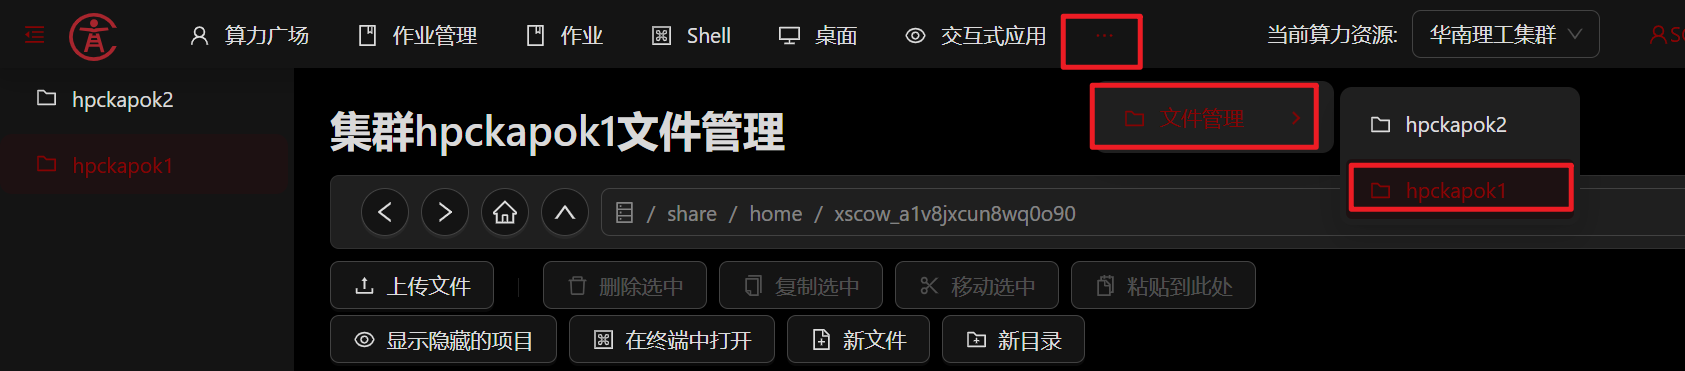


生成的结果为：

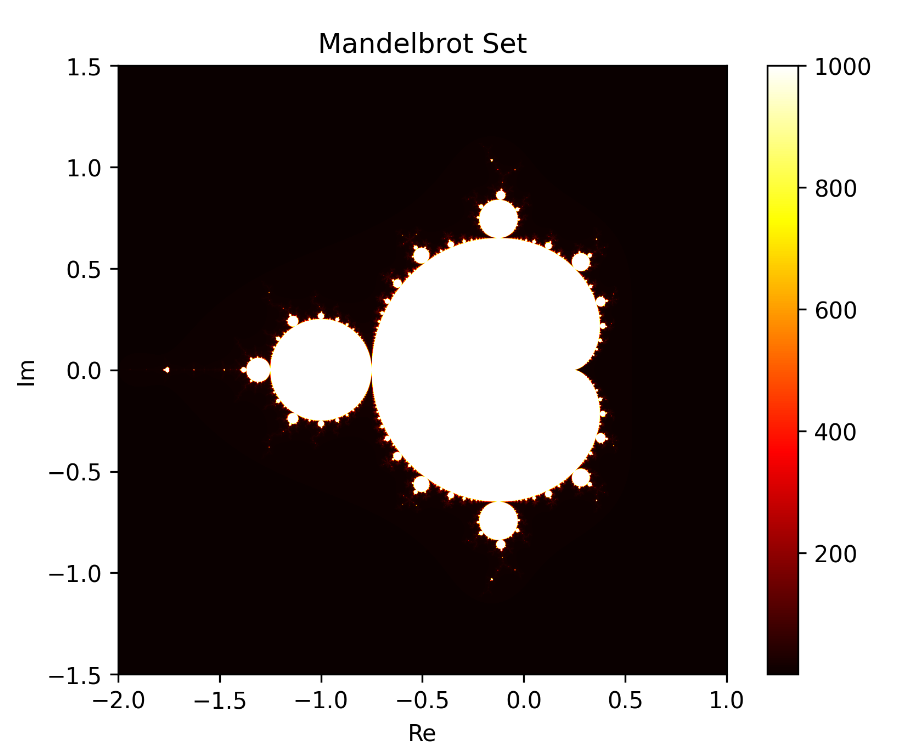





---

> 作者: 黎颖; 龙汀汀
>
> 联系方式: yingliclaire@pku.edu.cn;   l.tingting@pku.edu.cn